# S4 Classes

## The Basic Idea

The S4 approach differs from the S3 approach to creating a class in that it is a more rigid definition. The idea is that an object is created using the setClass command. The command takes a number of options. Many of the options are not required, but we make use of several of the optional arguments because they represent good practices with respect to object oriented programming.

We first construct a trivial, contrived class simply to demonstrate the basic idea. Next we demonstrate how to create a method for an S4 class. This example is a little more involved than what we saw in the section on S3 classes.

In this example, the name of the class is FirstQuadrant, and the class is used to keep track of an (x,y) coordinate pair in the first quadrant. There is a restriction that both values must be greater than or equal to zero. There are two data elements, called slots, and they are called x and y. The default values for the coordinate is the origin, x=0 and y=0.

In [1]:
######################################################################
# Create the first quadrant class
#
# This is used to represent a coordinate in the first quadrant.
FirstQuadrant <- setClass(
        # Set the name for the class
        "FirstQuadrant",

        # Define the slots
        slots = c(
                x = "numeric",
                y = "numeric"
                ),

        # Set the default values for the slots. (optional)
        prototype=list(
                x = 0.0,
                y = 0.0
                ),

        # Make a function that can test to see if the data is consistent.
        # This is not called if you have an initialize function defined!
        validity=function(object)
        {
                if((object@x < 0) || (object@y < 0)) {
                        return("A negative number for one of the coordinates was given.")
                }
                return(TRUE)
        }
        )

Note that the way to access one of the data elements is to use the “@” symbol. An example if given below. In the example three elements of the class defined above are created. The first uses the default values for the slots, the second overrides the defaults, and finally an attempt is made to create a coordinate in the second quadrant.

In [2]:
x <- FirstQuadrant()
x

An object of class "FirstQuadrant"
Slot "x":
[1] 0

Slot "y":
[1] 0


In [3]:
y <- FirstQuadrant(x=5,y=7)
y

An object of class "FirstQuadrant"
Slot "x":
[1] 5

Slot "y":
[1] 7


In [4]:
y@x

[1] 5

In [5]:
y@y

[1] 7

In [6]:
z <- FirstQuadrant(x=3,y=-2)
z

ERROR: Error in validObject(.Object): invalid class “FirstQuadrant” object: A negative number for one of the coordinates was given.


In the next example we create a method that is associated with the class. The method is used to set the values of a coordinate. The first step is to reserve the name using the setGeneric command, and then the setMethod command is used to define the function to be called when the first argument is an object from the FirstQuadrant class.

In [7]:
# create a method to assign the value of a coordinate
setGeneric(name="setCoordinate",
                       def=function(theObject,xVal,yVal)
                       {
                               standardGeneric("setCoordinate")
                       }
                       )

setMethod(f="setCoordinate",
                      signature="FirstQuadrant",
                      definition=function(theObject,xVal,yVal)
                      {
                              theObject@x <- xVal
                              theObject@y <- yVal
                              return(theObject)
                      }
                      )


[1] "setCoordinate"

[1] "setCoordinate"

It is important to note that R generally passes objects as values. For this reason the methods defined above return the updated object. When the method is called, it is used to replace the former object with the updated object.

In [8]:
z <- FirstQuadrant(x=2.5,y=10)
z

An object of class "FirstQuadrant"
Slot "x":
[1] 2.5

Slot "y":
[1] 10


In [9]:
z <- setCoordinate(z,-3.0,-5.0)
z

An object of class "FirstQuadrant"
Slot "x":
[1] -3

Slot "y":
[1] -5


Note that the validity function given in the original class definition is not called. It is called when an object is first defined. It can be called later, but only when an explicit request is made using the validObject command.

## Creating an S4 Class

An S4 class is created using the setClass() command. At a minimum the name of the class is specified and the names of the data elements (slots) is specified. There are a number of other options, and just as a matter of good practice we also specify a function to verify that the data is consistent (validation), and we specify the default values (the prototype). In the last section of this page, S4 inheritance, we include an additional parameter used to specify a class hierarchy.

In this section we look at another example, and we examine some of the functions associated with S4 classes. The example we define will be used to motivate the use of methods associated with a class, and it will be used to demonstrate inheritance later. The idea is that we want to create a program to simulate a cellular automata model of a predator-prey system.

We do not develop the whole code here but concentrate on the data structures. In particular we will create a base class for the agents. In the next section we will create the basic methods for the class. In the inheritance section we will discuss how to build on the class to create different predators and different prey species. The basic structure of the class is shown in Figure 1.

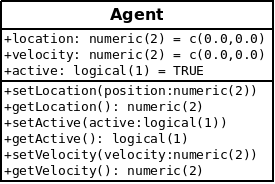

Diagram of the base class, Agent, used for the agents in a simulation.

The methods for this class are defined in the following section. Here we define the class and its slots, and the code to define the class is given below:



In [10]:
######################################################################
# Create the base Agent class
#
# This is used to represent the most basic agent in a simulation.
Agent <- setClass(
        # Set the name for the class
        "Agent",

        # Define the slots
        slots = c(
                location = "numeric",
                velocity   = "numeric",
                active   = "logical"
                ),

        # Set the default values for the slots. (optional)
        prototype=list(
                location = c(0.0,0.0),
                active   = TRUE,
                velocity = c(0.0,0.0)
                ),

        # Make a function that can test to see if the data is consistent.
        # This is not called if you have an initialize function defined!
        validity=function(object)
        {
                if(sum(object@velocity^2)>100.0) {
                        return("The velocity level is out of bounds.")
                }
                return(TRUE)
        }
        )


Now that the code to define the class is given we can create an object whose class is Agent.

In [11]:
a <- Agent()
a

An object of class "Agent"
Slot "location":
[1] 0 0

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


Before we define the methods for the class a number of additional commands are explored. The first set of functions explored are the is.object and the isS4 commands. The is.object command determines whether or not a variable refers to an object. The isS4 command determines whether or not the variable is an S4 object. The reason both are required is that the isS4 command alone cannot determine if a variable is an S3 object. You need to determine if the variable is an object and then decide if it is S4 or not.

In [12]:
is.object(a)

isS4(a)

[1] TRUE

[1] TRUE

The next set of commands are used to get information about the data elements, or slots, within an object. The first is the slotNames command. This command can take either an object or the name of a class. It returns the names of the slots associated with the class as strings.

In [13]:
slotNames(a)

[1] "location" "velocity" "active"

In [14]:
slotNames("Agent")

[1] "location" "velocity" "active"

The getSlots command is similar to the slotNames command. It takes the name of a class as a string. It returns a vector whose entries are the types associated with the slots, and the names of the entries are the names of the slots.

In [15]:
getSlots("Agent")
s <- getSlots("Agent")
s[1]
s[[1]]
names(s)

location  velocity    active 
"numeric" "numeric" "logical"

location 
"numeric"

[1] "numeric"

[1] "location" "velocity" "active"

The next command examined is the getClass command. It has two forms. If you give it a variable that is an S4 class it returns a list of slots for the class associated with the variable. If you give it a character string with the name of a class it gives the slots and their data types.



In [16]:
getClass(a)

An object of class "Agent"
Slot "location":
[1] 0 0

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


In [17]:
getClass("Agent")

Class "Agent" [in ".GlobalEnv"]

Slots:
                                 
Name:  location velocity   active
Class:  numeric  numeric  logical

The final command examined is the slot command. It can be used to get or set the value of a slot in an object. It can be used in place of the “@” operator.

In [18]:
slot(a,"location")

[1] 0 0

In [19]:
slot(a,"location") <- c(1,5)
a

An object of class "Agent"
Slot "location":
[1] 1 5

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


## Creating Methods

We now build on the Agent class defined above. Once the class and its data elements are defined we can define the methods associated with the class. The basic idea is that if the name of a function has not been defined, the name must first be reserved using the setGeneric function. The setMethod can then be used to define which function is called based on the class names of the objects sent to it.

We define the methods associated with the Agent method given in the previous section. Note that the validity function for an object is only called when it is first created and when an explicit call to the validObject function is made. We make use of the validObject command in the methods below that are used to change the value of a data element within an object.

In [20]:
# create a method to assign the value of the location
setGeneric(name="setLocation",
                       def=function(theObject,position)
                       {
                               standardGeneric("setLocation")
                       }
                       )

setMethod(f="setLocation",
                      signature="Agent",
                      definition=function(theObject,position)
                      {
                              theObject@location <- position
                              validObject(theObject)
                              return(theObject)
                      }
                      )

# create a method to get the value of the location
setGeneric(name="getLocation",
                       def=function(theObject)
                       {
                               standardGeneric("getLocation")
                       }
                       )

setMethod(f="getLocation",
                      signature="Agent",
                      definition=function(theObject)
                      {
                              return(theObject@location)
                      }
                      )


# create a method to assign the value of active
setGeneric(name="setActive",
                       def=function(theObject,active)
                       {
                               standardGeneric("setActive")
                       }
                       )

setMethod(f="setActive",
                      signature="Agent",
                      definition=function(theObject,active)
                      {
                              theObject@active <- active
                              validObject(theObject)
                              return(theObject)
                      }
                      )

# create a method to get the value of active
setGeneric(name="getActive",
                       def=function(theObject)
                       {
                               standardGeneric("getActive")
                       }
                       )

setMethod(f="getActive",
                      signature="Agent",
                      definition=function(theObject)
                      {
                              return(theObject@active)
                      }
                      )


# create a method to assign the value of velocity
setGeneric(name="setVelocity",
                       def=function(theObject,velocity)
                       {
                               standardGeneric("setVelocity")
                       }
                       )

setMethod(f="setVelocity",
                      signature="Agent",
                      definition=function(theObject,velocity)
                      {
                              theObject@velocity <- velocity
                              validObject(theObject)
                              return(theObject)
                      }
                      )

# create a method to get the value of the velocity
setGeneric(name="getVelocity",
                       def=function(theObject)
                       {
                               standardGeneric("getVelocity")
                       }
                       )

setMethod(f="getVelocity",
                      signature="Agent",
                      definition=function(theObject)
                      {
                              return(theObject@velocity)
                      }
                      )

[1] "setLocation"

[1] "setLocation"

[1] "getLocation"

[1] "getLocation"

[1] "setActive"

[1] "setActive"

[1] "getActive"

[1] "getActive"

[1] "setVelocity"

[1] "setVelocity"

[1] "getVelocity"

[1] "getVelocity"

With these definitions the data elements are encapsulated and can be accessed and set using the methods given above. It is generally good practice in object oriented programming to keep your data private and not show them to everybody willy nilly.

In [21]:
a <- Agent()
getVelocity(a)

a <- setVelocity(a,c(1.0,2.0))
getVelocity(a)

[1] 0 0

[1] 1 2

The last topic examined is the idea of overloading functions. In the examples above the signature is set to a single element. The signature is a vector of characters and specifies the data types of the argument list for the method to be defined. Here we create two new methods. The name of the method is resetActivity, and there are two versions.

The first version accepts two arguments whose types are Agent and logical. This version of the method will set the activity slot to a given value. The second version accepts two arguments whose types are Agent and numeric. This version will set the activity to TRUE and then set the energy level to the value passed to it. Note that the names of the variables in the argument list must be exactly the same.

In [22]:
# create a method to reset the velocity and the activity
setGeneric(name="resetActivity",
                       def=function(theObject,value)
                       {
                               standardGeneric("resetActivity")
                       }
                       )

setMethod(f="resetActivity",
                      signature=c("Agent","logical"),
                      definition=function(theObject,value)
                      {
                              theObject <- setActive(theObject,value)
                              theObject <- setVelocity(theObject,c(0.0,0.0))
                              return(theObject)
                      }
                      )

setMethod(f="resetActivity",
                      signature=c("Agent","numeric"),
                      definition=function(theObject,value)
                      {
                              theObject <- setActive(theObject,TRUE)
                              theObject <- setVelocity(theObject,value)
                              return(theObject)
                      }
                      )

[1] "resetActivity"

[1] "resetActivity"

[1] "resetActivity"

This definition of the function yields two options for the resetActivity function. The decision to determine which function to call depends on two arguments and their type. For example, if the first argument is from the Agent class and the second is a value of TRUE or FALSE, then the first version of the function is called. Otherwise, if the second argument is a number the second version of the function is called.

In [23]:
a <- Agent()
a

An object of class "Agent"
Slot "location":
[1] 0 0

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


In [24]:
a <- resetActivity(a,FALSE)
getActive(a)

[1] FALSE

In [25]:
a <- resetActivity(a,c(1,3))
getVelocity(a)

[1] 1 3

## Inheritance

A class’ inheritance hiearchy can be specified when the class is defined using the contains option. The contains option is a vector that lists the classes the new class inherits from. In the following example we build on the Agent class defined in the previous section. The idea is that we need agents that represent a predator and two prey. We will focus on two predators for this example.

The hierarchy for the classes is shown in Figure 2.. In this example we have one Prey class that is derived from the Agent class. There are two predator classes, Bobcat and Lynx. The Bobcat class is derived from the Agent class, and the Lynx class is derived from the Bobcat class. We will keep this very simple, and the only methods associated with the new classes is a move method. For our purposes it will only print out a message and set the values of the position and velocity to demonstrate the order of execution of the methods associated with the classes.

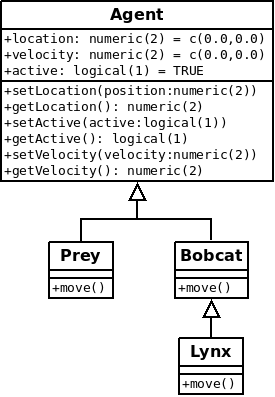

Figure 2. Diagram of the predator and prey classes derived from the Agent class.

The first step is to create the three new classes.

In [26]:
######################################################################
# Create the Prey class
#
# This is used to represent a prey animal
Prey <- setClass(
        # Set the name for the class
        "Prey",

        # Define the slots - in this case it is empty...
        slots = character(0),

        # Set the default values for the slots. (optional)
        prototype=list(),

        # Make a function that can test to see if the data is consistent.
        # This is not called if you have an initialize function defined!
        validity=function(object)
        {
                if(sum(object@velocity^2)>70.0) {
                        return("The velocity level is out of bounds.")
                }
                return(TRUE)
        },

        # Set the inheritance for this class
        contains = "Agent"
        )



######################################################################
# Create the Bobcat class
#
# This is used to represent a smaller predator
Bobcat <- setClass(
        # Set the name for the class
        "Bobcat",

        # Define the slots - in this case it is empty...
        slots = character(0),

        # Set the default values for the slots. (optional)
        prototype=list(),

        # Make a function that can test to see if the data is consistent.
        # This is not called if you have an initialize function defined!
        validity=function(object)
        {
                if(sum(object@velocity^2)>85.0) {
                        return("The velocity level is out of bounds.")
                }
                return(TRUE)
        },

        # Set the inheritance for this class
        contains = "Agent"
        )

######################################################################
# Create the Lynx class
#
# This is used to represent a larger predator
Lynx <- setClass(
        # Set the name for the class
        "Lynx",

        # Define the slots - in this case it is empty...
        slots = character(0),

        # Set the default values for the slots. (optional)
        prototype=list(),

        # Make a function that can test to see if the data is consistent.
        # This is not called if you have an initialize function defined!
        validity=function(object)
        {
                if(sum(object@velocity^2)>95.0) {
                        return("The velocity level is out of bounds.")
                }
                return(TRUE)
        },

        # Set the inheritance for this class
        contains = "Bobcat"
        )

The inheritance is specified using the contains option in the setClass command. Note that this can be a vector allowing for multiple inheritance. We choose not to use that to keep things simpler. If you are feeling like you need more self-loathing in your life you should try it out and experiment.

Next we define a method, move, for the new classes. We will include methods for the Agent, Prey, Bobcat, and Lynx classes. The methods do not really do anything but are used to demonstrate the idea of how methods are executed.

In [27]:
# create a method to move the agent.
setGeneric(name="move",
                       def=function(theObject)
                       {
                               standardGeneric("move")
                       }
                       )

setMethod(f="move",
                      signature="Agent",
                      definition=function(theObject)
                      {
                              print("Move this Agent dude")
                              theObject <- setVelocity(theObject,c(1,2))
                              validObject(theObject)
                              return(theObject)
                      }
                      )

setMethod(f="move",
                      signature="Prey",
                      definition=function(theObject)
                      {
                              print("Check this Prey before moving this dude")
                              theObject <- callNextMethod(theObject)
                              print("Move this Prey dude")
                              validObject(theObject)
                              return(theObject)
                      }
                      )

setMethod(f="move",
                      signature="Bobcat",
                      definition=function(theObject)
                      {
                              print("Check this Bobcat before moving this dude")
                              theObject <- setLocation(theObject,c(2,3))
                              theObject <- callNextMethod(theObject)
                              print("Move this Bobcat dude")
                              validObject(theObject)
                              return(theObject)
                      }
                      )

setMethod(f="move",
                      signature="Lynx",
                      definition=function(theObject)
                      {
                              print("Check this Lynx before moving this dude")
                              theObject <- setActive(theObject,FALSE)
                              theObject <- callNextMethod(theObject)
                              print("Move this Lynx dude")
                              validObject(theObject)
                              return(theObject)
                      }
                      )


[1] "move"

[1] "move"

[1] "move"

[1] "move"

[1] "move"

There are a number of things to note. First each method calls the callNextMethod command. This command will execute the next version of the same method for the previous class in the hierarchy. Note that I have included the arguments (in the same order) as those called by the original function. Also note that the function returns a copy of the object and is used to update the object passed to the original function.

Another thing to note is that the methods associated with the Lync, Bobcat, and Agent classes arbitrarily change the values of the position, velocity, and activity for the given object. This is done to demonstrate the changes that take place and reinforce the necessity for using the callNextMethod function the way it is used here.

Finally, it should be noted that the validObject command is called in every method. You should try adding a print statement in the validity function. You might find that the order is a bit odd. You should experiment with this and play with it. There are times you do not get the expected results so be careful!

We now give a brief example to demonstrate the order that the functions are called. In the example we create a Bobcat object and then call the move method. We next create a Lynx object and do the same. We print out the slots for both agents just to demonstrate the values that are changed.

In [28]:
robert <- Bobcat()
robert

An object of class "Bobcat"
Slot "location":
[1] 0 0

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


In [29]:
robert <- move(robert)

[1] "Check this Bobcat before moving this dude"
[1] "Move this Agent dude"
[1] "Move this Bobcat dude"


In [30]:
robert

An object of class "Bobcat"
Slot "location":
[1] 2 3

Slot "velocity":
[1] 1 2

Slot "active":
[1] TRUE


In [31]:
lionel <- Lynx()
lionel

An object of class "Lynx"
Slot "location":
[1] 0 0

Slot "velocity":
[1] 0 0

Slot "active":
[1] TRUE


In [32]:
lionel <- move(lionel)

[1] "Check this Lynx before moving this dude"
[1] "Check this Bobcat before moving this dude"
[1] "Move this Agent dude"
[1] "Move this Bobcat dude"
[1] "Move this Lynx dude"


In [33]:
lionel

An object of class "Lynx"
Slot "location":
[1] 2 3

Slot "velocity":
[1] 1 2

Slot "active":
[1] FALSE
